# Predicting the Sale Price of Bulldozers using Machine Learning

This machine learning project's goal is to predic the sale price of bulldozers.

## 1. Problem Definition

 > How well can we predict the future sale of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition.
Source:https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview

There ara 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices. The goal for this project (as with most regression evaluation metrics) will be to minimize RMSLE.

For more info about the evaluation of the project visit:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset.

In [3]:
# Data dictionary (metadata)
# data_dict = pd.read_excel(r'C:\Users\josep\Desktop\Data Science Group\Jose_data_analysis\Machine learning\Predicting_Bulldozer_prices\data\bluebook-for-bulldozers\Data Dictionary.xlsx')

In [4]:
# pd.set_option('display.max_colwidth', None)
# data_dict

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [6]:
# Import the training and validation sets
df = pd.read_csv(r'C:\Users\josep\Desktop\Data Science Group\Jose_data_analysis\Machine learning\Predicting_Bulldozer_prices\data\bluebook-for-bulldozers\TrainAndValid.csv',
                 low_memory=False)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [8]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

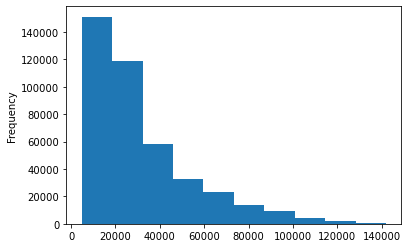

In [9]:
df.SalePrice.plot.hist();

In [10]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

### Date parsing

As the salesdata column has a dtype = object it presents a series of limitations for the possible work on a time series, then the logical course of action is to transform this data to a datetime object using pandas, this aplies to all columns which have dates.

In [11]:
# Importing data using date parsing
df = pd.read_csv(r'C:\Users\josep\Desktop\Data Science Group\Jose_data_analysis\Machine learning\Predicting_Bulldozer_prices\data\bluebook-for-bulldozers\TrainAndValid.csv',
                 low_memory=False,
                 parse_dates=['saledate'])

In [12]:
df.saledate.dtype

dtype('<M8[ns]')

In [13]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

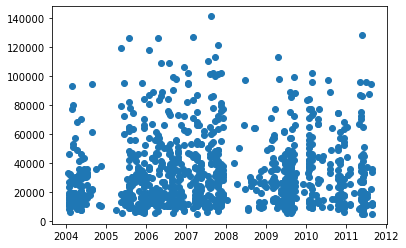

In [14]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

In [15]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sort DataFrame by saledate
When working with time series data, its recommended to sort it by date.

In [16]:
# Sort DataFrame in date order
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


### Make a copy of the original DataFrame

In [17]:
df_tmp = df.copy()

### Add datetime parameters for `saledate`column

In [18]:
df_tmp['saleYear'] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayOfWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayOfYear'] = df_tmp.saledate.dt.dayofyear

In [19]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [20]:
# Once the DataFrame has been enriched with datetime features the saledate can be removed
df_tmp.drop('saledate', axis=1, inplace=True)

## 5. Modelling

Once the EDA has been performed to satisfactory degree a model driven EDA can be performed.

In [21]:
from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_jobs=-1,
#                              random_state=42)

# As the data is unfit to be used at the moment to fit the model
# this will be instantiated once the data has been properly cleaned.

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

In [23]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert strings to categories

To be able to fit the data into the model the data type of all the features must be numeric, the way this is achieved is by converting them into categories.

In [24]:
# Columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [25]:
# Turning all string types into categorical values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

In [26]:
# Checking the results
df_tmp.dtypes

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

In [27]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Saving preprocessed data

In [28]:
# Exporting current tmp dataframe
df_tmp.to_csv(r'C:\Users\josep\Desktop\Data Science Group\Jose_data_analysis\Machine learning\Predicting_Bulldozer_prices\data\bluebook-for-bulldozers\train_tmp.csv',
             index=False)

In [29]:
# Import preprocessed data
df_tmp = pd.read_csv(r'C:\Users\josep\Desktop\Data Science Group\Jose_data_analysis\Machine learning\Predicting_Bulldozer_prices\data\bluebook-for-bulldozers\train_tmp.csv',
                    low_memory=False)

### Splitting the data into train/validation sets

Following the rules imposed in the competition held by kaggle:
* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012. The predictions are made on this set throughout the majority of the competition. The score on this set is used to create the public leaderboard.

In [30]:
df_tmp[['saleYear', 'saleMonth']]

,saleYear,saleMonth
0,1989,1
1,1989,1
2,1989,1
3,1989,1
4,1989,1
...,...,...
412693,2012,4
412694,2012,4
412695,2012,4
412696,2012,4


In [31]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

## Filling missing values

### Fill numerical missing values

In [32]:
# Checking missing values in the training dataset
df_train.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [33]:
# Checking missing values in the validation dataset
df_val.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter     6834
UsageBand                    7542
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3536
fiModelSeries                9814
fiModelDescriptor            8676
ProductSize                  5830
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 8847
Enclosure                       9
Forks                        5935
Pad_Type                     9611
Ride_Control                 7451
Stick                        9611
Transmission                 6796
Turbocharged                 9611
Blade_Extension             10809
Blade_Width                 10809
Enclosure_Type

In [34]:
# Checking for numeric columns in the datasets
def numeric_col_checker(dataset):
    for label, content in dataset.items():
        if pd.api.types.is_numeric_dtype(content):
            print(label)

In [35]:
# Training dataset numeric columns, as the format is the same for both validation and training data the result
# applies to both datasets.
numeric_col_checker(df_train)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [36]:
# Numeric columns with null values
def num_col_null_checker(dataset):
    for label, content in dataset.items():
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            print(label)

In [37]:
# Checking for null values in the training dataset numeric colunmns
num_col_null_checker(df_train)

auctioneerID
MachineHoursCurrentMeter


In [38]:
# Checking for null values in the validation dataset numeric colunmns
num_col_null_checker(df_val)

MachineHoursCurrentMeter


In [39]:
# Filling the missing values with the median
def missing_value_filler(dataset):
    for label, content in dataset.items():
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            # add a binary column which tells if the data was missing
            dataset[label+'is_missing'] = pd.isnull(content)
            # fill missing numeric values with median
            dataset[label] = content.fillna(content.median())
    return dataset

In [40]:
df_train = missing_value_filler(df_train.copy())
df_val = missing_value_filler(df_val.copy())

In [66]:
df_val['auctioneerID'].dtype

dtype('float64')

In [41]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerIDis_missing,MachineHoursCurrentMeteris_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,...,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,...,Lever,NaN,NaN,1989,1,31,1,31,False,True


In [42]:
df_val.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeteris_missing
401125,4449186,46173.2,2318824,26964,173,99.0,1996,0.0,NaN,D65E12,...,None or Unspecified,None or Unspecified,NaN,NaN,2012,1,1,6,1,False
401126,1222855,66000.0,531393,23926,121,3.0,1000,8145.0,Low,12HNA,...,NaN,NaN,NaN,NaN,2012,1,4,2,4,False
401127,6258613,26800.0,1810917,13260,149,99.0,2000,24.0,Low,590SUPER LII,...,NaN,NaN,NaN,NaN,2012,1,4,2,4,False
401128,6282680,42100.0,1543404,1830,149,99.0,2004,4373.0,Medium,120C,...,NaN,NaN,NaN,NaN,2012,1,4,2,4,False
401129,6282759,62100.0,1863077,11390,149,99.0,2006,3467.0,Medium,160CLC,...,NaN,NaN,NaN,NaN,2012,1,4,2,4,False


### Filling and turning categorical variables into numbers

In [43]:
# Check for columns which aren't numeric
def non_numeric_col_check(dataset):
    for label, content in dataset.items():
        if not pd.api.types.is_numeric_dtype(content):
            print(label)

In [44]:
# As with the numeric columns case both validation and training datasets share the same data structure so only one must
# be checked
non_numeric_col_check(df_train)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [45]:
def missing_nn_value_filler(dataset):
    for label, content in dataset.items():
        if not pd.api.types.is_numeric_dtype(content):
            dataset[label+'is_missing'] = pd.isnull(content)
            dataset[label] = pd.Categorical(dataset[label]).codes + 1
    return dataset

In [85]:
df_train = missing_nn_value_filler(df_train.copy())
df_val = missing_nn_value_filler(df_val.copy())

In [84]:
df_train.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4537,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1800,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2324,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1799,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2095,...,True,True,True,True,True,False,False,False,True,True


In [83]:
df_val.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
401125,4449186,46173.2,2318824,26964,173,99.0,1996,0.0,0,962,...,True,True,True,True,True,False,False,False,True,True
401126,1222855,66000.0,531393,23926,121,3.0,1000,8145.0,2,23,...,True,True,True,True,True,True,True,True,True,True
401127,6258613,26800.0,1810917,13260,149,99.0,2000,24.0,2,461,...,True,True,True,True,True,True,True,True,True,True
401128,6282680,42100.0,1543404,1830,149,99.0,2004,4373.0,3,14,...,False,False,False,False,False,True,True,True,True,True
401129,6282759,62100.0,1863077,11390,149,99.0,2006,3467.0,3,45,...,False,False,False,False,False,True,True,True,True,True


In [78]:
df_train.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

In [77]:
df_val.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 102, dtype: int64

With all the data in a numeric format and no missing values, the data can be splitted into x & y.

In [51]:
# Split data into x & y
x_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
x_valid, y_valid = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 101), (11573,))

In [87]:
df_difference = [x for x in df_train.columns if x not in df_val]
df_difference

['auctioneerIDis_missing']

In [90]:
x_train = x_train.drop('auctioneerIDis_missing', axis=1)

In [91]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((401125, 101), (401125,), (11573, 101), (11573,))

In [92]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)
# Fitting the model
model.fit(x_train, y_train)

Wall time: 4min 27s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [93]:
# Evaluating the model
model.score(x_valid, y_valid)

0.4951552106745304

### Building a evaluation function

In [94]:
# Create evaluation function (RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    Calculate root mean squared log error between predictions and true
    labels
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))
    
# Create function  to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Validation MAE': mean_absolute_error(y_valid, val_preds),
              'Training RMLSE': rmsle(y_train, train_preds),
              'Valid RMSLE': rmsle(y_valid, val_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Valid R^2': r2_score(y_valid, val_preds)}
    return scores

In [95]:
%%time
show_scores(model)

Wall time: 9.78 s


{'Training MAE': 1578.5086819071362,
 'Validation MAE': 10988.552135142141,
 'Training RMLSE': 0.08422693580017795,
 'Valid RMSLE': 0.4899575944155123,
 'Training R^2': 0.987506178898538,
 'Valid R^2': 0.4951552106745304}

## Testing the model on a subset to tune hyperparameters

In [100]:
# Change max sample values
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [101]:
%%time
model.fit(x_train, y_train)

Wall time: 14.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [102]:
show_scores(model)

{'Training MAE': 5561.983997357431,
 'Validation MAE': 9822.381323770845,
 'Training RMLSE': 0.2577146114173136,
 'Valid RMSLE': 0.3900903245856883,
 'Training R^2': 0.8606794943170875,
 'Valid R^2': 0.658787472340558}

### Hyperparameter tuning with RandomizedSearchCV

In [104]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor Hyperparameters
rf_grid = {'n_estimators': np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto'],
           'max_samples': [10000]}

# Instantiate RandomForestSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=10,
                              cv=5,
                              verbose=True)

In [105]:
%%time
rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 5min 34s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [106]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [107]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6073.276955923068,
 'Validation MAE': 10298.043006578293,
 'Training RMLSE': 0.27617747730414616,
 'Valid RMSLE': 0.3975314957317596,
 'Training R^2': 0.8372904177515061,
 'Valid R^2': 0.6533477988658799}

### Train a model with the best hyperparameters

In [114]:
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators = 90,
                                     min_samples_split = 18,
                                     min_samples_leaf = 1,
                                     max_samples = None,
                                     max_features = 0.5,
                                     n_jobs = -1,
                                     max_depth = None,
                                     random_state=42)

In [115]:
%%time
# Fit ideal model
ideal_model.fit(x_train, y_train)

Wall time: 2min 3s


RandomForestRegressor(max_features=0.5, min_samples_split=18, n_estimators=90,
                      n_jobs=-1, random_state=42)

In [117]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 3192.6891206300174,
 'Validation MAE': 10352.430117244312,
 'Training RMLSE': 0.15443102471023326,
 'Valid RMSLE': 0.399891612423221,
 'Training R^2': 0.9524909641837147,
 'Valid R^2': 0.6323801688817798}

## Make predictions on test data

In [187]:
# Import the test data
df_test = pd.read_csv(r'C:\Users\josep\Desktop\Data Science Group\Jose_data_analysis\Machine learning\Predicting_Bulldozer_prices\data\bluebook-for-bulldozers\test.csv',
                     low_memory=False,
                     parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [188]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

### Preprocessing test data

In [189]:
# Enriching the data with date time features
def preprocess_data(dataset):
    '''
    Performs transformations in df and returns transformed df.
    '''
    dataset['saleYear'] = dataset.saledate.dt.year
    dataset['saleMonth'] = dataset.saledate.dt.month
    dataset['saleDay'] = dataset.saledate.dt.day
    dataset['saleDayOfWeek'] = dataset.saledate.dt.dayofweek
    dataset['saleDayOfYear'] = dataset.saledate.dt.dayofyear
    
    dataset.drop('saledate', axis=1, inplace=True)
        
    # Filling missing numerical values with the median
    dataset = missing_value_filler(dataset.copy())
    
    # Filling missing non numerical values
    dataset = missing_nn_value_filler(dataset.copy())
    
    return dataset

In [190]:
df_test = preprocess_data(df_test)

In [191]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [193]:
# Making predictions
test_preds = ideal_model.predict(df_test)
test_preds

array([18528.64292044, 18728.43154932, 49605.3497619 , ...,
       13462.19527232, 16777.73625299, 24773.76796345])

### Format predictions into the same format Kaggle wants for submissions

Source: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

In [212]:
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalePrice'] = test_preds

In [213]:
df_preds

,SalesID,SalePrice
0,1227829,18528.642920
1,1227844,18728.431549
2,1227847,49605.349762
3,1227848,65203.388720
4,1227863,57646.352011
...,...,...
12452,6643171,38395.131810
12453,6643173,12477.704946
12454,6643184,13462.195272
12455,6643186,16777.736253


In [216]:
# Exporting the results
df_preds.to_csv(r'C:\Users\josep\Desktop\Data Science Group\Jose_data_analysis\Machine learning\Predicting_Bulldozer_prices\data\bluebook-for-bulldozers\test_predictions.csv',
                index=False)

### Feature importance

This step seeks to figure out which different attributes of the data were of most importance when it came to predicting the target variable (SalePrice).

In [227]:
# Feature importance plotter function
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,
                        'feature_importances': importances})
         .sort_values('feature_importances', ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.invert_yaxis()
    ax.set_xlabel('Feature Importance')

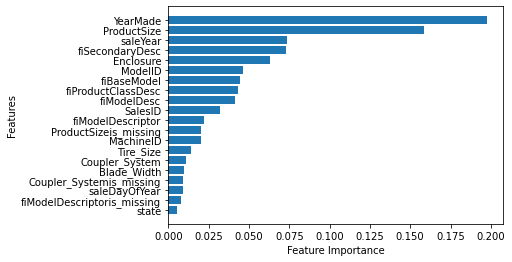

In [228]:
plot_features(x_train.columns, ideal_model.feature_importances_)